In [1]:
import cv2
import numpy as np
import glob
import time
import skimage.io as io
from skimage.filters import *
import matplotlib.pyplot as plt
from skimage.morphology import *
from skimage.exposure import equalize_hist
from skimage.filters import gaussian,median
import math
from scipy  import signal 
from segmentation import *

In [2]:
gs_img = io.imread("test/3/2.jpg",True)


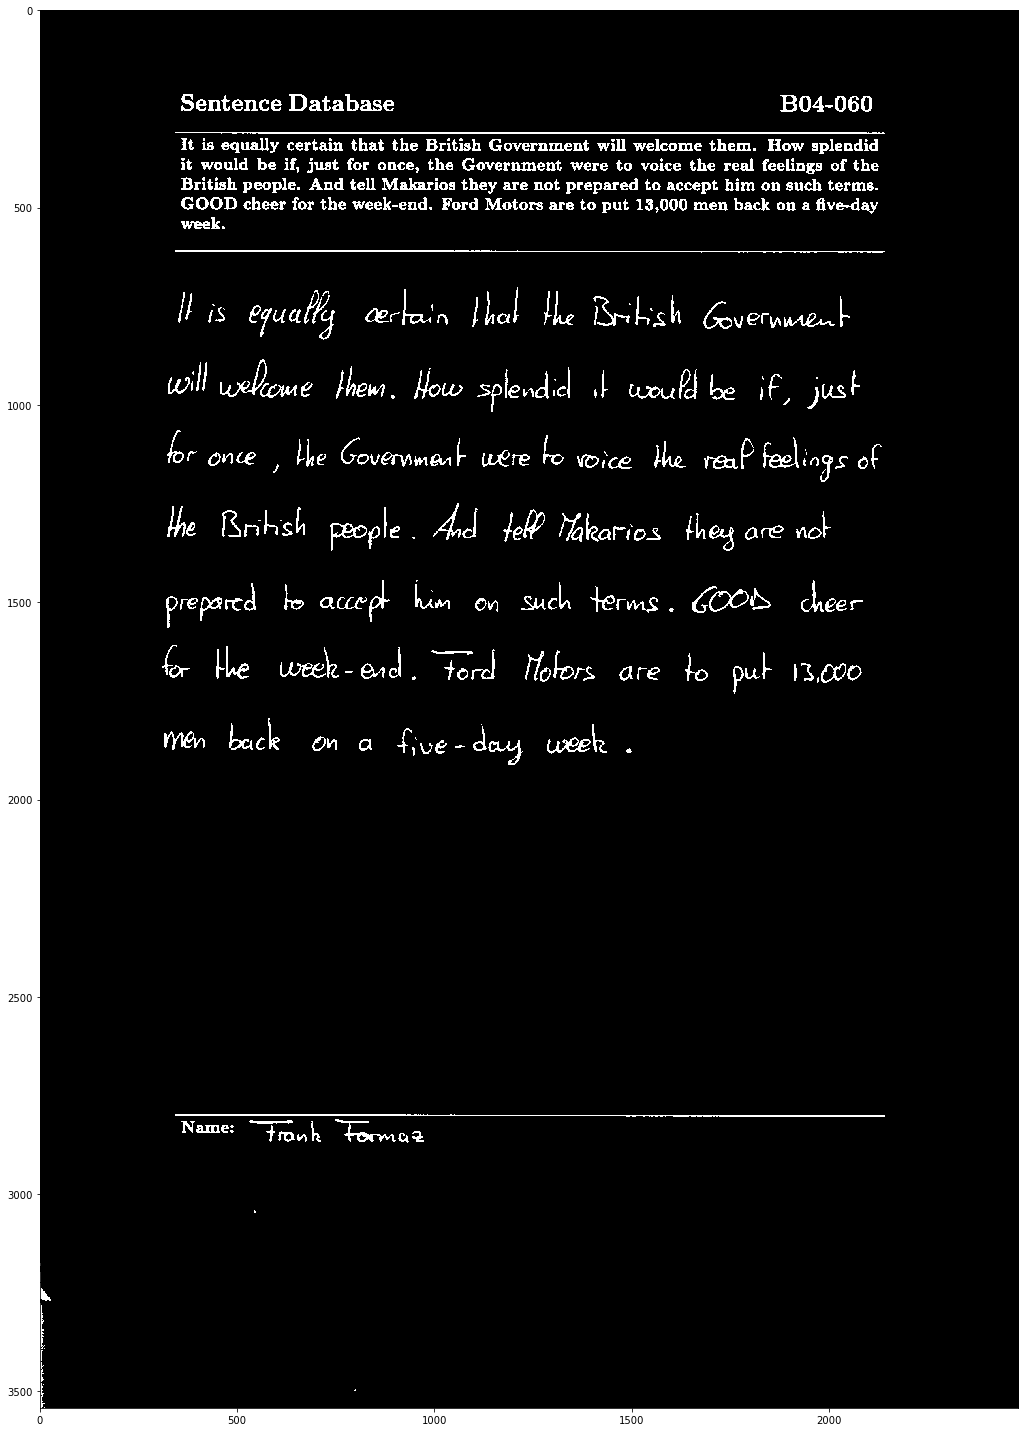

In [3]:
b_img=binarize_gray_img(gs_img)
plt.figure(figsize=(20,20))
io.imshow(b_img)

[ 310  610 2799]


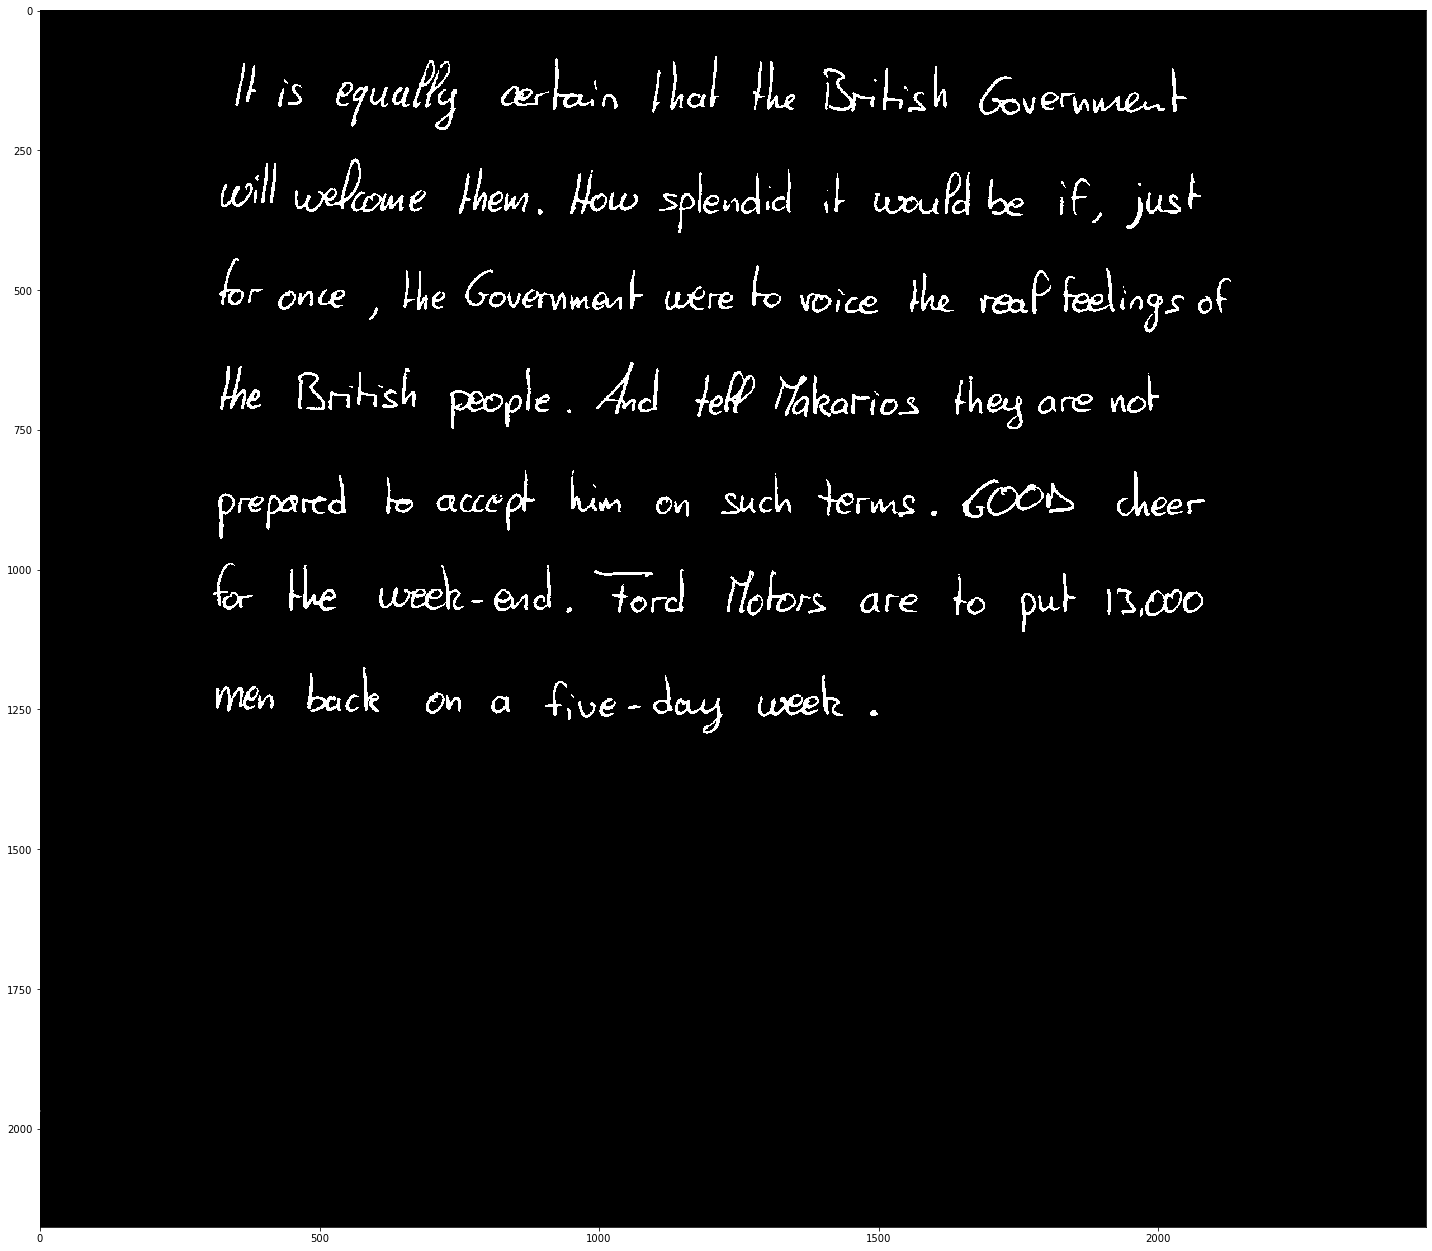

In [4]:
croped =get_writtig_area(b_img)
plt.figure(figsize=(20,20))
io.imshow(croped)

In [5]:
   
def get_lines_positions(bin_img):
    # this function return unique indexes of the horizontal lines  
    staff_lines_img = extract_lines(bin_img)
    unique_indexes, _ = remove_duplicates(staff_lines_img)
    return unique_indexes


In [6]:
print(get_lines_positions(b_img))

[ 310  610 2799]


In [7]:
line_limits = get_writing_lines_limits(croped)

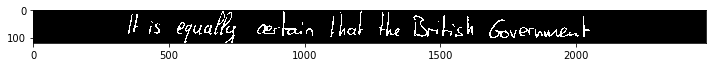

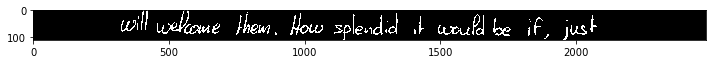

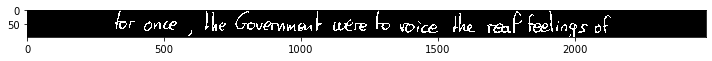

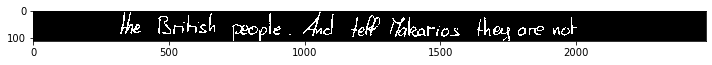

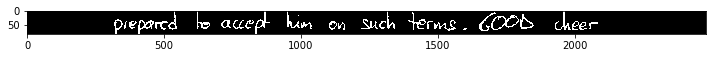

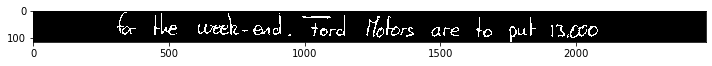

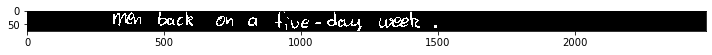

In [8]:
for limit in line_limits:
    plt.figure(figsize=(10,20))
    io.imshow(croped[limit[0]:limit[1] ,:])

In [9]:
def plot_h_proj(image, figsize=(5,5)):
    x, _ = image.shape
    y_plot = np.arange(0,x,1)
    h_proj = np.sum(image,axis=1)
    h_proj-=int(np.mean(h_proj))
    _, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=figsize)
    plt.gray()
    ax1.imshow(image, aspect='auto')
    ax2.barh(y_plot, h_proj)

In [10]:
# plot_h_proj(croped,(20,20))

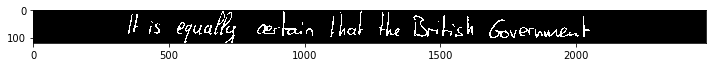

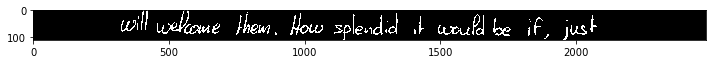

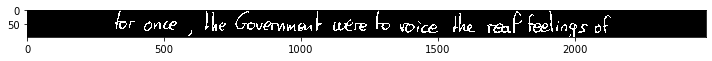

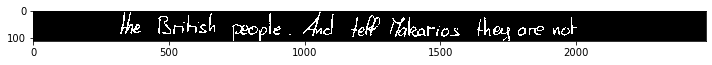

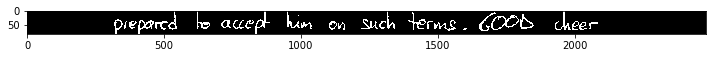

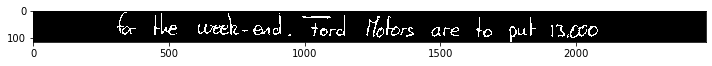

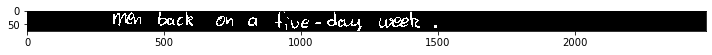

[0, 2174]
(2177, 2479)


<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [11]:
f = open("F:\\Pattern_Proj_Dataset\\ascii\\forms.txt",'r') # File called form in ascii from dataset 
# this file has the name of all writer along with the name of each photo 
#Name of each photo is in file name and Writer ID is in same index but in Writer ID array
FileNames = []
WriterID = []
for i in range(16):
    next(f,None)
for line in f:
    Splitted = line.split(sep=' ')
    FileNames.append(Splitted[0])
    WriterID.append(Splitted[1])


f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Pattern_Proj_Dataset\\ascii\\forms.txt'

In [24]:
Dataset_FileName = 'F:\\Pattern_Proj_Dataset\\Form\\'
Dataset_Files = 'F:\\Pattern_Proj_Dataset\\Form\\*.png'

def ShowImage(name,formName='image'):
    res = cv2.resize(name,(768,768))
    cv2.imshow(formName,res)
    cv2.waitKey(0);
    
def returnFilePath(name):
    return Dataset_FileName + name + '.png'

def CompareToImage(img,img2,name1='image1',name2='image2'):
    res = cv2.resize(img,(768,768))
    cv2.imshow(name1,res)
    ShowImage(img2,name2)

In [17]:
# houghlines variables

rho = 10 # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 1  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 350  # minimum number of pixels making up a line
max_line_gap = 5# maximum gap in pixels between connectable line segments

get lines changes gets all line using houghtransformP
draw Lines , draw the output of getlines on the original 

In [27]:
def GetLines(img):
    '''
    Applies GaussianBlur -> Threholding -> HoughLines 
    Output : array containing CV Line objects , with all lines detected in image
    '''
    blur_gauss = cv2.GaussianBlur(img,(5,5),0)
    _ , threshed = cv2.threshold(blur_gauss , 200 , 255 , cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    ShowImage(threshed)
    line_image = np.copy(img) * 0  # creating a blank to draw lines on
    
    lines = cv2.HoughLinesP(threshed, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
    return lines ,line_image
def drawLines(lines , imgToDrawOn):
    ''' 
    Draws the line on image , to know what lines you have extracted 
    '''
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(imgToDrawOn,(x1,y1),(x2,y2),(255,0,0),5)
def printLines(lines):
    '''
    Print X and y of line (start and end) to know where the line exists on the photo
    '''
    print(lines.shape[0])
    for line in lines:
        for x1,y1,x2,y2 in line:
            print("Start : ( {} , {} ) , End : ( {} , {} ) ".format(x1,y1,x2,y2))

In [28]:
def AllFunctionalities(img,printLine = False ):
    '''
    Extract lines from an image
    Output : the image with lines drawn on it
            and the array with line co-ordinates
    '''
    lines , line_image  = GetLines(img)
    drawLines(lines,line_image)
    if(printLine) : printLines(lines)
    ImgWithLines = cv2.addWeighted(img, 0.8, line_image, 1, 0)

    return ImgWithLines , lines

In [31]:
img = cv2.imread(returnFilePath('a01-000u'),0)
ShowImage(img)

In [30]:
img = cv2.imread(returnFilePath(FileNames[0]),0)
ShowImage(img)

In [37]:
#No Crop
ImgWithLines , lines = AllFunctionalities(img,printLine=True)
ShowImage(ImgWithLines)

8
Start : ( 13 , 3541 ) , End : ( 13 , 1282 ) 
Start : ( 16 , 2708 ) , End : ( 16 , 2299 ) 
Start : ( 0 , 3381 ) , End : ( 0 , 1182 ) 
Start : ( 0 , 135 ) , End : ( 10 , 764 ) 
Start : ( 1547 , 2788 ) , End : ( 2180 , 2788 ) 
Start : ( 369 , 359 ) , End : ( 899 , 359 ) 
Start : ( 427 , 609 ) , End : ( 1138 , 609 ) 
Start : ( 4 , 498 ) , End : ( 10 , 866 ) 


Notes:
When image is cropped , different lines are found even if the same function is used

Sometimes a line is found if image is cropped but cant be found if image is not cropped , and vice versa

In [38]:
# With Crop
ImgWithLines , lines = AllFunctionalities(img[400:,300:],printLine=True)
ShowImage(ImgWithLines)

3
Start : ( 125 , 209 ) , End : ( 836 , 209 ) 
Start : ( 296 , 2393 ) , End : ( 1005 , 2393 ) 
Start : ( 86 , 2395 ) , End : ( 625 , 2395 ) 


Notice that lines 3 and 4 have a difference of two in the Y axis , so basically are the same line